In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

C:\Users\Jaehyeong\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [5]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(f'5 교차 검증의 평균 RMSE: {avg_rmse:.3f}')

5 교차 검증의 개별 Negative MSE scores: [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
5 교차 검증의 개별 RMSE scores: [2.82 3.61 4.53 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.420


In [6]:
def get_model_cv_prediction(model, x_data, y_target):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(f'5 교차 검증의 평균 RMSE: {avg_rmse: 0.3f}')

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000, n_jobs=-1)
lgb_reg = LGBMRegressor(n_estimators=1000, n_jobs=-1)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, x_data, y_target)

#####  DecisionTreeRegressor  #####
5 교차 검증의 평균 RMSE:  5.978
#####  RandomForestRegressor  #####
5 교차 검증의 평균 RMSE:  4.420
#####  GradientBoostingRegressor  #####
5 교차 검증의 평균 RMSE:  4.269
[16:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
5 교차 검증의 평균 RMSE:  4.089
#####  LGBMRegressor  #####
5 교차 검증의 평균 RMSE:  4.646


C:\Users\Jaehyeong\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


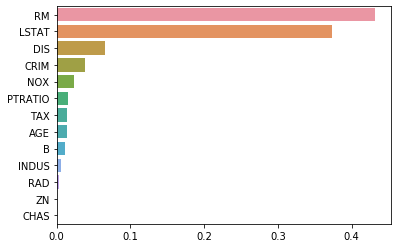

In [8]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


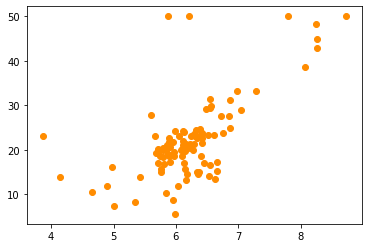

In [11]:
import matplotlib.pyplot as  plt
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

models = [lr_reg, rf_reg2, rf_reg7]

x_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

x_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

pred = []
for model in models:
    model.fit(x_feature, y_target)
    pred.append(model.predict(x_test))

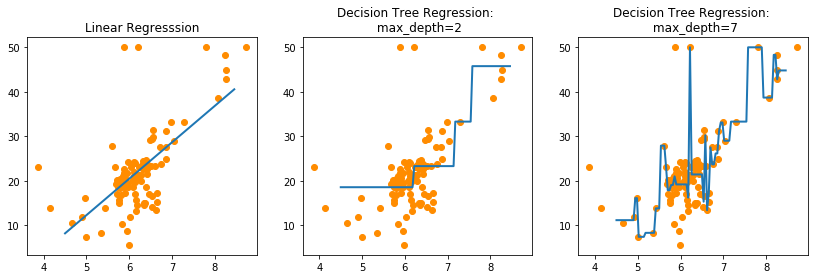

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regresssion')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(x_test, pred[0], label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(x_test, pred[1], label='max_depth:3', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(x_test, pred[2], label='max_depth:7', linewidth=2)